# Exploratory Data Analysis - Pizza Sales

Pour ce 4ème projet, je vais réaliser l'analyse des données d'un dataset de ventes de Pizza.
Pour cela, je vais utiliser les librairies Python.

### Début d'exploration

Lien du dataset : https://www.kaggle.com/datasets/nextmillionaire/pizza-sales-dataset/data

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('pizza_sales.csv')

J'importe les différentes librairies qui vont me servir et je vérifie avec df.head() à quoi ressemble le fichier.

In [36]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


Je sais que j'ai 48620 lignes et 12 colonnes. Je vérifie avec df.describe() quelques informations sur les colonnes au format numérique.

Ensuite avec la commande df.nunique() je peux voir le nombre unique de données par colonnes. Par exemple en pizza_size, on a 5 nombre unique de tailles : S, M, L, XL, XXL. Je peux vérifier avec la colonne en question pizza_size.

In [104]:
df["pizza_size"].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [51]:
df.nunique()

order_details_id     48620
order_id             21350
pizza_id                91
quantity                 4
order_date             358
order_time           16382
unit_price              25
total_price             56
pizza_size               5
pizza_category           4
pizza_ingredients       32
pizza_name              32
dtype: int64

In [41]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


Je fais de même avec les colonnes catégorielles

In [45]:
df.describe(include = object)

,pizza_id,order_date,order_time,pizza_size,pizza_category,pizza_ingredients,pizza_name
count,48620,48620,48620,48620,48620,48620,48620
unique,91,358,16382,5,4,32,32
top,big_meat_s,11/26/2015,12:32:00,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
freq,1811,261,26,18526,14579,2416,2416


Je peux également vérifier s'il y a des valeurs nulles. Cette commande retourne un booléen si une valeur N/A existe.

In [48]:
df.isna().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

On vérifie s'il y a des doublons/duplicates.

In [58]:
df.duplicated().sum()

0

### Graphiques

Pour débuter la création de graphiques pour notre EDA, je peux réaliser une heatmap qui est très utiles afin de voir la corrélation entre les variables.
Deux variables en corrélation montre une relation existante entre elles.

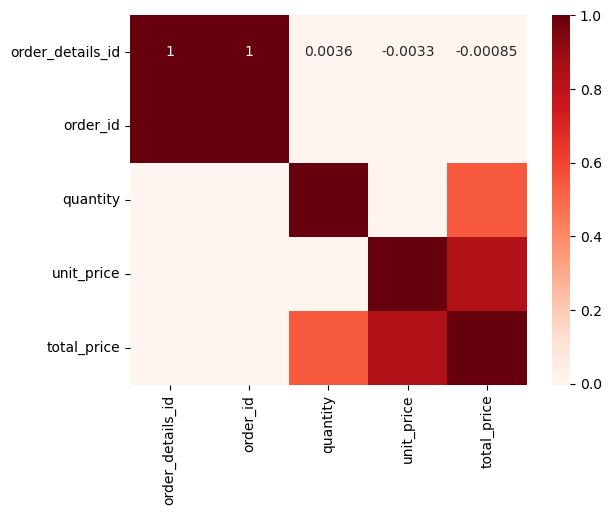

In [66]:
numeric_columns = df.select_dtypes(include= ['number']) 
sns.heatmap(numeric_columns.corr(),cmap = 'Reds', annot =True)
plt.show()

### Ventes par catégorie de Pizza

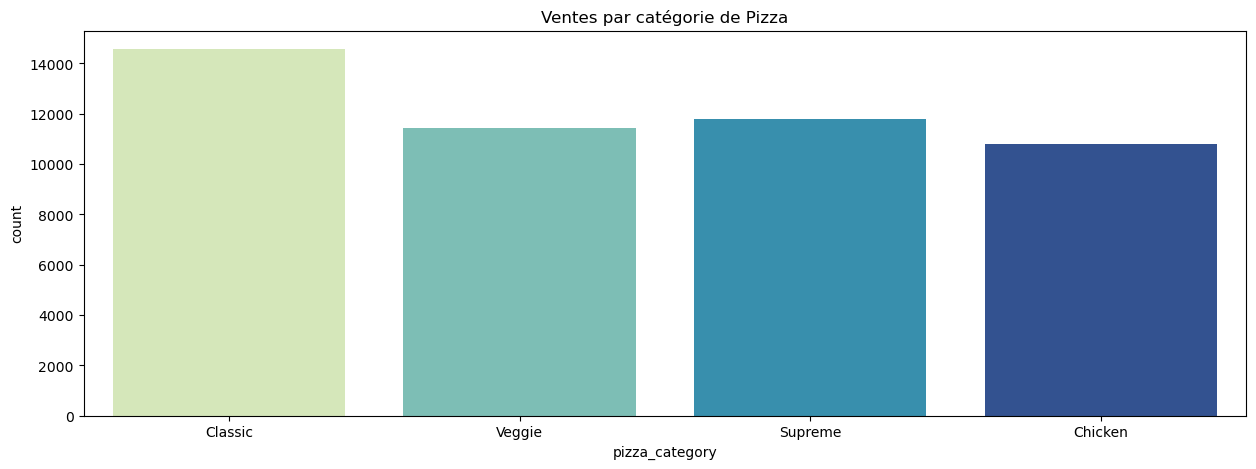

In [72]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="pizza_category", palette="YlGnBu")
plt.title("Ventes par catégorie de Pizza")
plt.show()

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

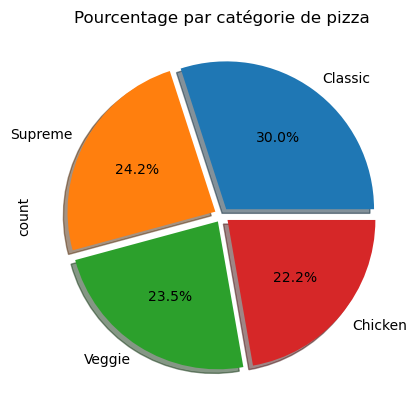

In [121]:
df['pizza_category'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0.05, 0.05, 0.05 ,0.05], shadow=True)
plt.title('Pourcentage par catégorie de pizza')
plt.ylabel

### Distribution selon la taille des pizzas

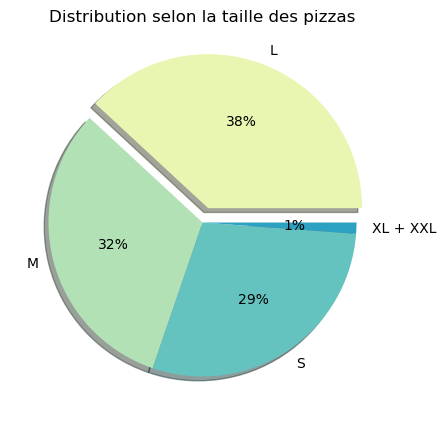

In [102]:
plt.figure(figsize=(10,5))
color_palette = sns.color_palette("YlGnBu")
size = df["pizza_size"].value_counts()
size["XL + XXL"] = size["XL"] + size["XXL"]
size = size.drop(["XL", "XXL"])

plt.pie(data = size,\
        x=size.values, labels = size.index, \
        explode=(0.1,0,0,0), autopct='%1.0f%%', \
        shadow=True, colors=color_palette)
plt.title("Distribution selon la taille des pizzas")
plt.show()


Une façon plus simple de faire en ayant une meilleure compréhension des répartitions :

Text(0, 0.5, 'Nombre Pizzas')

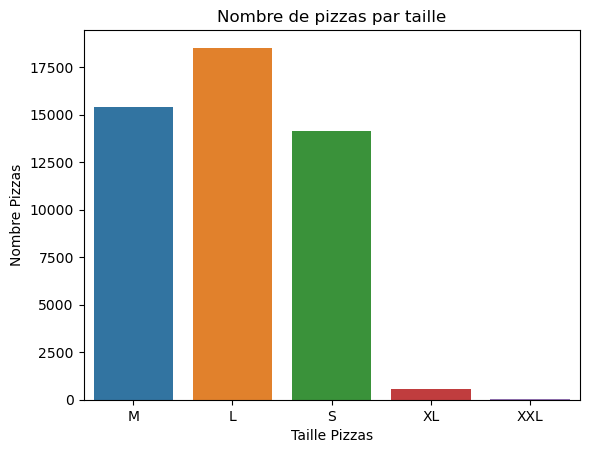

In [133]:
sns.countplot(data =df , x= 'pizza_size')
plt.title('Nombre de pizzas par taille')
plt.xlabel('Taille Pizzas')
plt.ylabel('Nombre Pizzas')

### Rangée de prix des pizzas

In [111]:
df["unit_price"].unique()

array([13.25, 16.  , 18.5 , 20.75, 16.5 , 12.75, 12.  , 12.5 , 20.5 ,
       20.25, 16.75, 15.25, 17.95, 16.25, 14.75,  9.75, 17.5 , 10.5 ,
       25.5 , 11.  , 14.5 , 12.25, 21.  , 23.65, 35.95])

<Axes: ylabel='unit_price'>

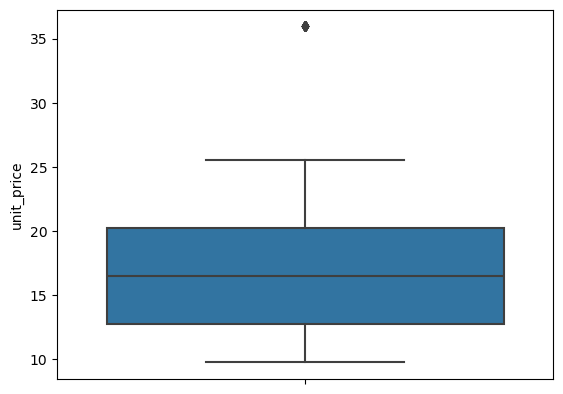

In [114]:
sns.boxplot(y = "unit_price", data = df)

On se situe à environ 16 euros la pizza.

### Les pizzas les plus populaires, le top 8 

Text(0, 0.5, 'Nombre')

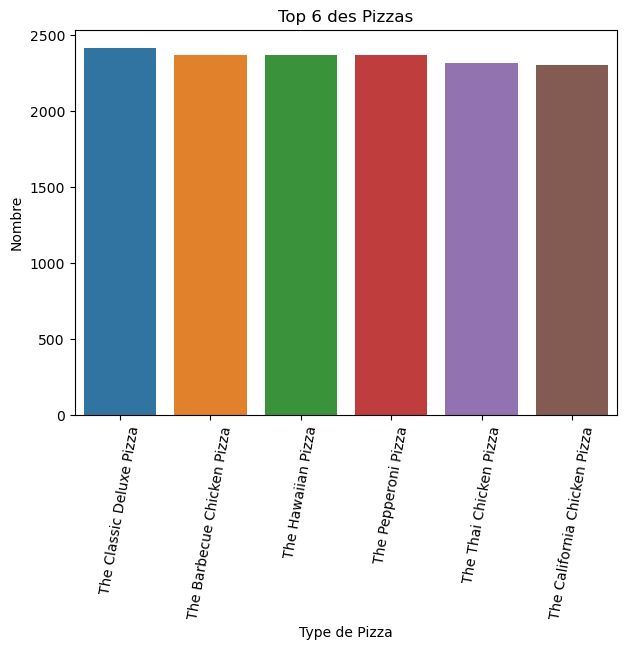

In [211]:
Top_6 = df['pizza_name'].value_counts().head(6).index.tolist()

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='pizza_name', order=Top_6)
plt.xticks(rotation=80)
plt.title('Top 6 des Pizzas')
plt.xlabel('Type de Pizza')
plt.ylabel('Nombre')

### Les jours et heures les plus populaires

Je convertis ma colonne order_date de mon dataframe en datetime et je récupère le jour de la semaine.

In [283]:
df

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,hour,day_numeric,day
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,11,NaN,Thursday
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,11,NaN,Thursday
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday,11,NaN,Thursday
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday,11,NaN,Thursday
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday,11,NaN,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,1900-01-01 21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,Thursday,21,NaN,Thursday
48616,48617,21348,four_cheese_l,1,2015-12-31,1900-01-01 21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,Thursday,21,NaN,Thursday
48617,48618,21348,napolitana_s,1,2015-12-31,1900-01-01 21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,Thursday,21,NaN,Thursday
48618,48619,21349,mexicana_l,1,2015-12-31,1900-01-01 22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday,22,NaN,Thursday


In [299]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['day'] = df['order_date'].dt.day_name()

days = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df['day_numeric'] = df['day'].map(days)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


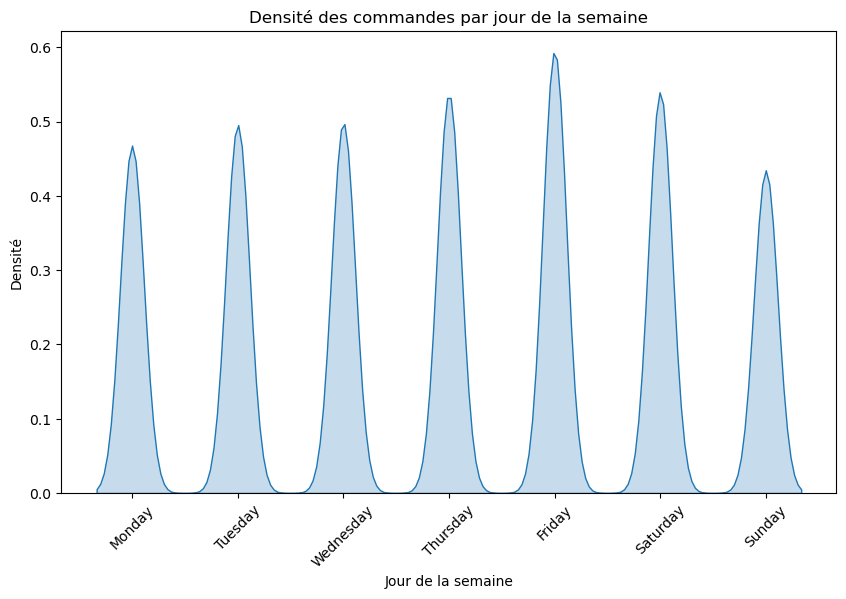

In [305]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='day_numeric', fill=True, bw_adjust=0.5)
plt.xticks(ticks=list(days.values()), labels=list(days.keys()), rotation=45)
plt.title('Densité des commandes par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Densité')
plt.show()

In [ ]:
Je fais de même pour changer le format du temps et je récupère l'heure.

In [199]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

df['hour'] = df['order_time'].dt.hour

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


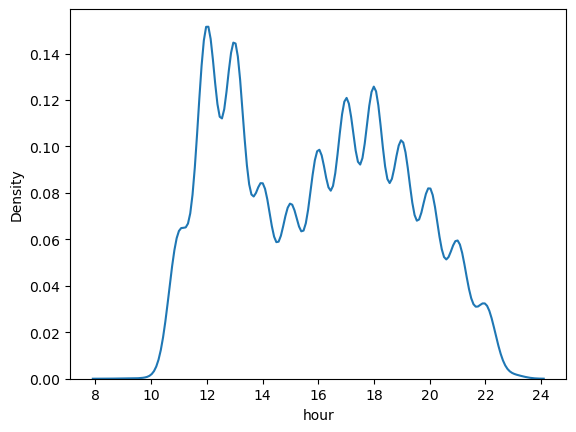

In [201]:
sns.kdeplot(df["hour"])
plt.show()

On remarque ainsi que les clients commandent généralement entre 12h et 13h, et en début d'après-midi vers 17h et 18h.

In [308]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.month_name()

months = {'January': 0, 'February': 1, 'March': 2, 'April': 3, 'May': 4, 'June': 5, 'July': 6, 'August': 7, 'September': 8, 'October': 9, 'November': 10, 'December': 11}
df['months_numeric'] = df['month'].map(months)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


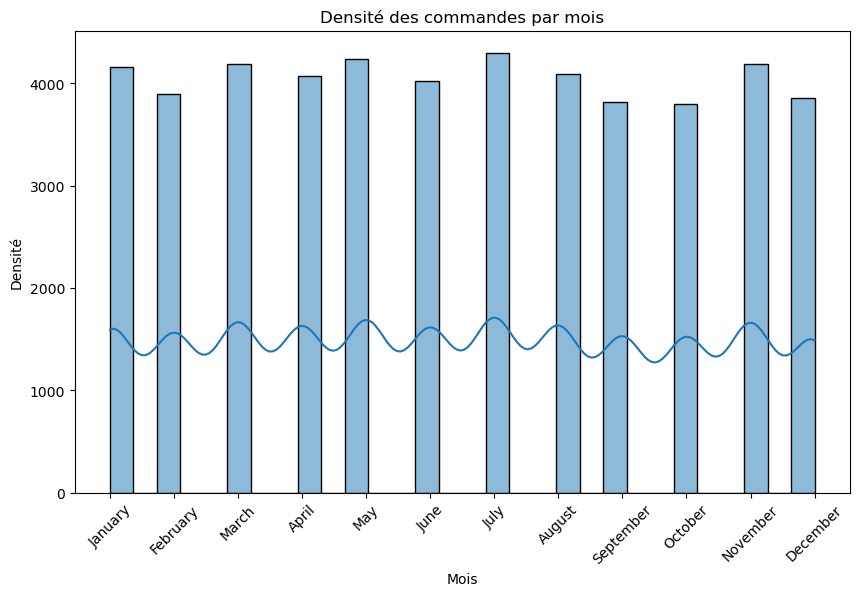

In [314]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='months_numeric', bins=30, kde=True)
plt.xticks(ticks=list(months.values()), labels=list(months.keys()), rotation=45)
plt.title('Densité de commandes par mois')
plt.xlabel('Mois')
plt.ylabel('Densité')
plt.show()

## Conclusion

 - La catégorie de pizzas la plus populaire est la classique, suivie de la catégorie Suprême, Veggie et en dernier Chicken.

- La taille de pizzas la plus achetée est la taille L

- La rangée moyenne des prix est entre 12 et 20 euros mais le plus souvent aux alentours de 16 euros.

- La pizza la plus populaire est la classic Pizza

- Les commandes se font notamment entre 12h et 13h puis entre 17h et 18h.

- Les jours les plus populaires sont le vendredi, samedi et jeudi !

- Mai et Juillet sont les mois ayant reçu le plus de commandes.